# Gas Sensor Array


In [3]:
%matplotlib inline

# numbers
import numpy as np
import pandas as pd

# stats
import statsmodels.api as sm
import scipy.stats as stats

# plots
import matplotlib.pyplot as plt
import seaborn as sns

# utils
import os, re, io
from pprint import pprint

## Overview of the Data

Start with an overview of the data: 
* 5 replicates of 8-sensor arrays (this is a statistical technique known as _blocking_, so the prefix B1-B5 indicates block 1 through block 5)
* 8 sensor channels (0-7), first 4 have 5.65 V, last 4 have 5.00 V
* 40 different gas conditions: varying concentration levels of ethylene, ethanol, carbon monoxide, methane
* Duration was 600 seconds, conductivity of each sensor acquired at 100 Hz

## File Conventions

The file naming convention is as follows:
* Each sensor response is provided in a text file
* File name codes the unit number (gas)
* Ea = ethanol
* CO = carbon monoxide
* Ey = ethylene
* Me = methane

Concentration = 010-100 of the corresponding gas

B1_GEa_F040_R2.txt indicates:
* B1 (board 1)
* Ea (Ethanol
* 50 ppm
* Repetition 2

## File Contents

The contents of each file is the elapsed time in seconds, and the resistance of each sensor in KOhms.
* Column 1 is time
* Following columns are channels 0-7


In [12]:
b1_files = [j for j in os.listdir('data/twin_gas_sensors') if 'B1' in j]
print len(b1_files)

160


In [14]:
all_files = [j for j in os.listdir('data/twin_gas_sensors')]
print len(all_files)

640


In [16]:
print b1_files[0]

B1_GCO_F010_R1.txt


In [41]:
def sensor_df(fname):
    prefix = 'data/twin_gas_sensors/'

    sensors = ['Sensor '+str(j) for j in range(8)]
    sensor_columns = ['Time'] + sensors

    df = pd.read_csv(prefix+fname,delimiter='\t',header=None,names=sensor_columns)
    return df

sdf1 = sensor_df(b1_files[0])

In [43]:
print sdf1.head()

   Time  Sensor 0  Sensor 1  Sensor 2  Sensor 3  Sensor 4  Sensor 5  Sensor 6  \
0  0.00     38.91     18.64      21.6      5.56     72.63     45.67     55.54   
1  0.01     38.91     18.66      21.6      5.56     72.85     45.67     55.40   
2  0.02     38.91     18.66      21.6      5.56     72.85     45.67     55.54   
3  0.03     38.99     18.66      21.6      5.56     72.85     45.77     55.40   
4  0.04     38.99     18.66      21.6      5.57     72.85     45.87     55.54   

   Sensor 7  
0      7.00  
1      6.99  
2      7.00  
3      6.99  
4      7.00  


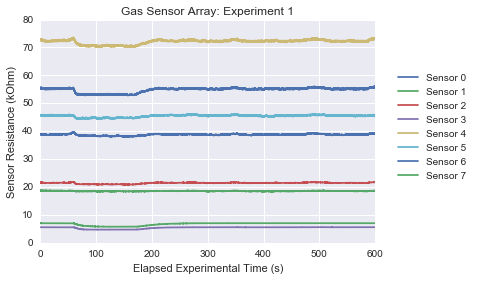

In [54]:
for j in range(8):
    seriesname = 'Sensor '+str(j)
    plt.plot(sdf1['Time'],sdf1[seriesname], label=seriesname)

plt.title("Gas Sensor Array: Experiment 1")
plt.xlabel('Elapsed Experimental Time (s)')
plt.ylabel('Sensor Resistance (kOhm)')
plt.legend(bbox_to_anchor=(1.3, 0.8))
plt.show()